# CPU overhead study
In this notebook, we study the CPU overhead of PowerAPI and Scaphandre by running each solution with different sampling frequency configurations on an isolated CPU core and by tracking the utilization rate of that core.

## Import necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

from visualize import *
import seaborn as sns
import matplotlib.pyplot as plt

## Scaphandre study

### Load experiment results

In [2]:
experiments_path = [
    'scaphandre-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-16-14_59_14',
    'scaphandre-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-17-01_40_44',
    'scaphandre-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-17-02_20_50',
    'scaphandre-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-17-03_00_51',
    'scaphandre-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-17-03_40_58',
    'scaphandre-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-17-04_20_52',
    'scaphandre-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-17-09_04_31',
    'scaphandre-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-17-09_44_24',
    'scaphandre-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-17-10_24_27',
    'scaphandre-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-17-11_04_08'
]

experiments_scaphandre = []

for experiment_path in experiments_path:
    parsed_experiment = parse_experiment("../results/%s" % experiment_path)
    experiments_scaphandre.append(parsed_experiment)

### Prepare overhead data

In [3]:
# Result dataframe
result_df = pd.DataFrame(columns=['benchmark', 'experiment', 'value'])

# Looping through all exeriments
for experiment in experiments_scaphandre[0]['experiments']:
    # Converting experiment results to benchmarks with dataframes
    benchmarks_cpu_load = convert_exp_into_benchmark_dataframes(experiments_scaphandre, experiment['name'] ,'cpu-load-scaphandre', 0)

    # Looping through all benchamrks
    for benchmark_name in benchmarks_cpu_load:
        # Looping through all dataframes in each benchmark
        for cpu_load in benchmarks_cpu_load[benchmark_name]['cpu-load-scaphandre']:
            cpu_load_dataframe = cpu_load['dataframe']

            cpu_load_dataframe['experiment'] = experiment['name']
            cpu_load_dataframe['benchmark'] = str(benchmark_name)

            # Select only CPU 0 on which solution was launched
            cpu_load_dataframe = cpu_load_dataframe[cpu_load_dataframe['cpu'] == 0]

            # Filter only necessary fields and add to result dataframe
            cpu_load_dataframe = cpu_load_dataframe.filter(items=['value', 'experiment', 'benchmark'])
            result_df = pd.concat([result_df, cpu_load_dataframe], ignore_index=True)
    
result_df

,benchmark,experiment,value
0,EP D NAS Benchmark,scaphandre-10,-5.826450e-13
1,EP D NAS Benchmark,scaphandre-10,2.200000e+00
2,EP D NAS Benchmark,scaphandre-10,2.000000e-01
3,EP D NAS Benchmark,scaphandre-10,2.000000e+00
4,EP D NAS Benchmark,scaphandre-10,0.000000e+00
...,...,...,...
1658,MG D NAS Benchmark,scaphandre-1,5.600000e+00
1659,MG D NAS Benchmark,scaphandre-1,6.000000e+00
1660,MG D NAS Benchmark,scaphandre-1,5.200000e+00
1661,MG D NAS Benchmark,scaphandre-1,5.400000e+00


### Calculate overhead statistics

In [4]:
result_df.groupby(['experiment'])[['value']].agg(['mean','std'])

value          
                   mean       std
experiment                       
scaphandre-1   5.083147  0.809270
scaphandre-10  1.405700  1.241214
scaphandre-2   4.539505  1.402329
scaphandre-5   2.517787  0.557486

### Plot overhead data

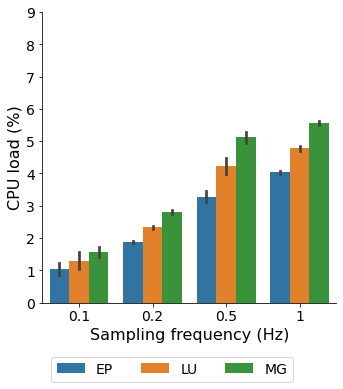

In [5]:
# Converting experiment names in frequency
result_df.loc[result_df['experiment'] == 'scaphandre-10','experiment'] = '0.1'
result_df.loc[result_df['experiment'] == 'scaphandre-5','experiment'] = '0.2'
result_df.loc[result_df['experiment'] == 'scaphandre-2','experiment'] = '0.5'
result_df.loc[result_df['experiment'] == 'scaphandre-1','experiment'] = '1'

result_df['benchmark'] = result_df['benchmark'].str[:2]

plt.rcParams.update({'font.size': 14})
plot = sns.catplot(x="experiment", y="value",
                 hue="benchmark",
                data=result_df, kind="bar")


plot.legend.set_title(None)
plot.set(ylim=(0, 9))

plot.set_xlabels("Sampling frequency (Hz)", fontsize="16")
plot.set_ylabels("CPU load (%)", fontsize="16") 

sns.move_legend(plot,
    "upper left",
    bbox_to_anchor=(0.14, 0.02),
    ncol=3,
    frameon=True
)

plot.savefig('../figures/scaphandre_cpu_overhead.pdf')
plot.savefig('../figures/scaphandre_cpu_overhead.png')

## PowerAPI study

### Load experiment results

In [6]:
experiments_path = [
    'powerapi-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-17-20_20_25',
    'powerapi-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-17-21_10_31',
    'powerapi-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-17-22_01_13',
    'powerapi-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-17-22_51_57',
    'powerapi-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-17-23_42_09',
    'powerapi-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-18-00_34_13',
    'powerapi-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-18-01_24_36',
    'powerapi-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-18-02_15_15',
    'powerapi-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-18-03_05_41',
    'powerapi-cpu-overhead-gemini-1.lyon.grid5000.fr-2022-08-18-03_56_24'
]

experiments_powerapi = []

for experiment_path in experiments_path:
    parsed_experiment = parse_experiment("../results/%s" % experiment_path)
    experiments_powerapi.append(parsed_experiment)

### Prepare overhead data

In [7]:
# Result dataframe
result_df = pd.DataFrame(columns=['benchmark', 'experiment', 'value'])

# Looping through all exeriments
for experiment in experiments_powerapi[0]['experiments']:
    
    # Converting experiment results to benchmarks with dataframes
    benchmarks_cpu_load = convert_exp_into_benchmark_dataframes(experiments_powerapi, experiment['name'] ,'cpu-load-powerapi', 0)

    # Looping through all benchamrks
    for benchmark_name in benchmarks_cpu_load:
        
        # Looping through all dataframes in each benchmark
        for cpu_load in benchmarks_cpu_load[benchmark_name]['cpu-load-powerapi']:
            cpu_load_dataframe = cpu_load['dataframe']

            cpu_load_dataframe['experiment'] = experiment['name']
            cpu_load_dataframe['benchmark'] = str(benchmark_name)

            # Select only CPU 0 on which solution was launched
            cpu_load_dataframe = cpu_load_dataframe[cpu_load_dataframe['cpu'] == 0]

            # Filter only necessary fields and add to result dataframe
            cpu_load_dataframe = cpu_load_dataframe.filter(items=['value', 'experiment', 'benchmark'])
            result_df = pd.concat([result_df, cpu_load_dataframe], ignore_index=True)
    
result_df

,benchmark,experiment,value
0,EP D NAS Benchmark,powerapi-1000,0.360144
1,EP D NAS Benchmark,powerapi-1000,0.239904
2,EP D NAS Benchmark,powerapi-1000,0.360144
3,EP D NAS Benchmark,powerapi-1000,0.200000
4,EP D NAS Benchmark,powerapi-1000,0.239904
...,...,...,...
2035,MG D NAS Benchmark,powerapi-50,9.381876
2036,MG D NAS Benchmark,powerapi-50,9.200000
2037,MG D NAS Benchmark,powerapi-50,8.945367
2038,MG D NAS Benchmark,powerapi-50,9.472422


### Calculate overhead statistics

In [8]:
result_df.groupby(['experiment'])[['value']].agg(['mean','std'])

value          
                   mean       std
experiment                       
powerapi-100   3.705558  1.241119
powerapi-1000  0.576440  0.242735
powerapi-50    6.944229  2.243462
powerapi-500   0.928686  0.358778
powerapi-80    4.564856  1.491379

### Plot overhead data

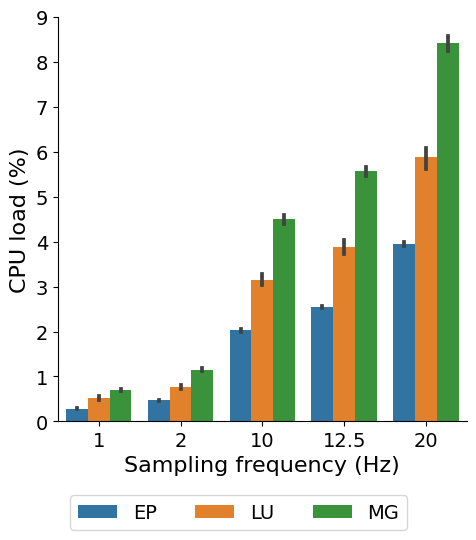

In [9]:
# Converting experiment names in frequency
result_df.loc[result_df['experiment'] == 'powerapi-1000','experiment'] = '1'
result_df.loc[result_df['experiment'] == 'powerapi-500','experiment'] = '2'
result_df.loc[result_df['experiment'] == 'powerapi-100','experiment'] = '10'
result_df.loc[result_df['experiment'] == 'powerapi-80','experiment'] = '12.5'
result_df.loc[result_df['experiment'] == 'powerapi-50','experiment'] = '20'

result_df['benchmark'] = result_df['benchmark'].str[:2]

plt.rcParams.update({'font.size': 14})
plot = sns.catplot(x="experiment", y="value",
                 hue="benchmark",
                data=result_df, kind="bar")

plot.legend.set_title(None)
plot.set(ylim=(0, 9))

plot.set_xlabels("Sampling frequency (Hz)", fontsize="16")
plot.set_ylabels("CPU load (%)", fontsize="16") 

sns.move_legend(plot,
    "upper left",
    bbox_to_anchor=(0.14, 0.02),
    ncol=3,
    frameon=True
)

plot.savefig('../figures/powerapi_cpu_overhead.pdf')
plot.savefig('../figures/powerapi_cpu_overhead.png')